In [1]:
%load_ext autoreload
import sys
# sys.argv.append("-lc=C:/Workspaces/AIC/simod-master/local_config_files/fido-PC.cfg")
sys.argv.append("-lc=C:/Workspaces/AIC/simod/local_config_files/fido-nb.cfg")

In [2]:
from simod.init import config
import roadmaptools.inout
import simod.statistics.model.edges as edges
import simod.statistics.comparisons.sensitivity_analysis as sa


INFO:root:Loading config for project RoadmaptoolsConfig (can be overwritten later)
INFO:root:map_dir: FILL YOUR MAP DIR HERE
osm_source_url: https://s3.amazonaws.com/metro-extracts.mapzen.com/valencia_spain.osm.bz2
osm_map_filename: FILL YOUR MAP DIR HEREmap.osm
filtered_osm_filename: FILL YOUR MAP DIR HEREmap-filtered.osm
geojson_file: FILL YOUR MAP DIR HEREmap.geojson
cleaned_geojson_file: FILL YOUR MAP DIR HEREmap-cleaned.geojson
sanitized_geojson_file: FILL YOUR MAP DIR HEREmap-sanitized.geojson
simplified_file: FILL YOUR MAP DIR HEREmap-simplified.geojson
simplified_file_with_speed: FILL YOUR MAP DIR HEREmap-simplified-speed.geojson
simplified_file_with_speed_and_curvature: FILL YOUR MAP DIR HEREmap-simplified-speed-curvature.geojson
ap_nodes_file: FILL YOUR MAP DIR HEREnodes.geojson
ap_edges_file: FILL YOUR MAP DIR HEREedges.geojson
utm_center_lon: 50.0877506
utm_center_lat: 14.4209293
shift_utm_coordinate_origin_to_utm_center: False
shapely_error_tolerance: 0.005
osm_filter_para

In [3]:
peak_experiments = {
    'delay_experiments': [
        ["vga-max_delay_3_min", "vga"],
        ["vga-lim-max_delay_3_min", "vga-lim", "vga-lim-max_delay_5_min", "vga-lim-max_delay_6_min", "vga-lim-max_delay_7_min"],
        ["vga-pnas-max_delay_3_min", "vga-pnas", "vga-pnas-max_delay_5_min", "vga-pnas-max_delay_6_min", "vga-pnas-max_delay_7_min"]
    ],
    'batch_experiments': [
        ["vga"],
        ["vga-lim", "vga-lim-batch_60s", "vga-lim-batch_90s", "vga-lim-batch_120s"],
        ["vga-pnas", "vga-pnas-batch_60s", "vga-pnas-batch_90s", "vga-pnas-batch_120s"]
    ],
    'capacity_experiments':[
        ['vga-capacity_2', "vga"],
        ['vga-lim-capacity_2', "vga-lim", 'vga-lim-capacity_10'],
        ['vga-pnas-capacity_2', "vga-pnas", 'vga-pnas-capacity_10']
    ]
}

off_peak_experiments = {
    'delay_experiments': [
        ["sw-vga-max_delay_3_min", "sw-vga", "sw-vga-max_delay_5_min", "sw-vga-max_delay_6_min"],
        ["sw-vga-lim-max_delay_3_min", "sw-vga-lim", "sw-vga-lim-max_delay_5_min", "sw-vga-lim-max_delay_6_min", "sw-vga-lim-max_delay_7_min"],
        ["sw-vga-pnas-max_delay_3_min", "sw-vga-pnas", "sw-vga-pnas-max_delay_5_min", "sw-vga-pnas-max_delay_6_min", "sw-vga-pnas-max_delay_7_min"]
    ],
    'batch_experiments': [
        ["sw-vga", "sw-vga-batch_60s", "sw-vga-batch_90s", "sw-vga-batch_120s"],
        ["sw-vga-lim", "sw-vga-lim-batch_60s", "sw-vga-lim-batch_90s", "sw-vga-lim-batch_120s"],
        ["sw-vga-pnas", "sw-vga-pnas-batch_60s", "sw-vga-pnas-batch_90s", "sw-vga-pnas-batch_120s"]
    ],
    'capacity_experiments':[
        ['sw-vga-capacity_2', "sw-vga", 'sw-vga-capacity_10'],
        ['sw-vga-lim-capacity_2', "sw-vga-lim", 'sw-vga-lim-capacity_10'],
        ['sw-vga-pnas-capacity_2', "sw-vga-pnas", 'sw-vga-pnas-capacity_10']
    ]
}

manhattan_experiments = {
    'delay_experiments': [
        ["vga-max_delay_3_min", "vga_gap_0002-start_1830-real_speeds", "vga_gap_0002-start_1830-real_speeds-delay_5_min", "vga-max_delay_6_min"],
        ["vga-lim-max_delay_3_min", "vga-lim", "vga-lim-max_delay_5_min", "vga-lim-max_delay_6_min", "vga-lim-max_delay_7_min"],
        ["vga-pnas-unlimeted_vehicles-max_delay_3_min", "vga-pnas_unlimeted_vehicles-start_1830-real_speeds", "vga-pnas-unlimeted_vehicles-max_delay_5_min", "vga-pnas-unlimeted_vehicles-max_delay_6_min", "vga-pnas-unlimeted_vehicles-max_delay_7_min"]
    ],
    'batch_experiments': [
        ["vga_gap_0002-start_1830-real_speeds", "vga-batch_60_s", "vga-batch_90_s", "vga-batch_120_s"],
        ["vga-lim", "vga-lim-batch_60_s", "vga-lim-batch_90_s", "vga-lim-batch_120_s"],
        ["vga-pnas_unlimeted_vehicles-start_1830-real_speeds", "vga-pnas-unlimeted_vehicles-batch_60_s", "vga-pnas-unlimeted_vehicles-batch_90_s", "vga-pnas-unlimeted_vehicles-batch_120_s"]
    ],
    'capacity_experiments':[
        ['vga-capacity_2', "vga_gap_0002-start_1830-real_speeds", 'vga-capacity_10'],
        ['vga-lim-capacity_2', "vga-lim", 'vga-lim-capacity_10'],
        ['vga-pnas-unlimeted_vehicles-capacity_2', "vga-pnas_unlimeted_vehicles-start_1830-real_speeds", 'vga-pnas-unlimeted_vehicles-capacity_10']
    ]
}
# for exp_set in manhattan_experiments.values():
#     for index, method in enumerate(exp_set):
#         new_list =  [f"Manhattan/{name}" for name in method]
#         exp_set[index] = new_list

In [4]:
loaded_edges = roadmaptools.inout.load_geojson(config.agentpolis.map_edges_filepath)
edge_data = edges.make_data_frame(loaded_edges)

[14:03:24]: Loading geojson file from: C:\AIC Data\Experiment Data\VGA\maps\edges.geojson


In [5]:
x_values_delay = [3, 4, 5, 6, 7]
x_values_batch = [30, 60, 90, 120]
x_values_capacity = [2, 5, 10]

x_values = [x_values_batch, x_values_delay, x_values_capacity]

# Peak Experiments

In [6]:
sa.check_experiments(peak_experiments)
distance_data, comp_time_data, delay_data = sa.load_experiments(peak_experiments, edge_data)

[14:03:50]: Loading csv file from: C:\AIC Data\Experiment Data\VGA\experiments\vga-max_delay_3_min\ridesharing.csv to dataframe
[14:03:52]: Loading csv file from: C:\AIC Data\Experiment Data\VGA\experiments\vga\ridesharing.csv to dataframe
[14:03:55]: Loading csv file from: C:\AIC Data\Experiment Data\VGA\experiments\vga-lim-max_delay_3_min\ridesharing.csv to dataframe
[14:03:57]: Loading csv file from: C:\AIC Data\Experiment Data\VGA\experiments\vga-lim\ridesharing.csv to dataframe
[14:04:00]: Loading csv file from: C:\AIC Data\Experiment Data\VGA\experiments\vga-lim-max_delay_5_min\ridesharing.csv to dataframe
[14:04:03]: Loading csv file from: C:\AIC Data\Experiment Data\VGA\experiments\vga-lim-max_delay_6_min\ridesharing.csv to dataframe
[14:04:03]: Loading csv file from: C:\AIC Data\Experiment Data\VGA\experiments\vga-lim-max_delay_7_min\ridesharing.csv to dataframe


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\AIC data\\Experiment Data\\VGA\\experiments//vga-lim-max_delay_7_min/ridesharing.csv'

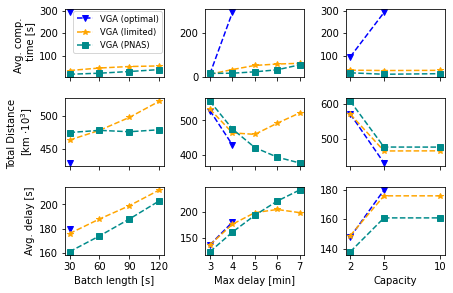

In [14]:
sa.plot_sensitivity_analysis(peak_experiments, distance_data, comp_time_data, delay_data, x_values)

In [19]:
distance_data

[528.694,
 429.258,
 532.849,
 464.028,
 459.63,
 492.067,
 521.878,
 555.84,
 475.378,
 421.344,
 393.496,
 376.576,
 429.258,
 464.028,
 478.652,
 498.319,
 522.804,
 475.378,
 478.679,
 476.585,
 479.578,
 570.807,
 429.258,
 570.496,
 464.028,
 464.385,
 608.01,
 475.378,
 475.216]

# Off-peak Experiments

In [18]:
sa.check_experiments(off_peak_experiments)
offpeak_speed_data, offpeak_tt_data, offpeak_delay_data = sa.load_experiments(off_peak_experiments, edge_data)

[19:42:15]: Loading csv file from: C:\AIC Experiment Data\VGA\experiments\sw-vga-max_delay_3_min\ridesharing.csv to dataframe
[19:42:17]: Loading csv file from: C:\AIC Experiment Data\VGA\experiments\sw-vga\ridesharing.csv to dataframe
[19:42:18]: Loading csv file from: C:\AIC Experiment Data\VGA\experiments\sw-vga-max_delay_5_min\ridesharing.csv to dataframe
[19:42:20]: Loading csv file from: C:\AIC Experiment Data\VGA\experiments\sw-vga-max_delay_6_min\ridesharing.csv to dataframe
[19:42:22]: Loading csv file from: C:\AIC Experiment Data\VGA\experiments\sw-vga-lim-max_delay_3_min\ridesharing.csv to dataframe
[19:42:23]: Loading csv file from: C:\AIC Experiment Data\VGA\experiments\sw-vga-lim\ridesharing.csv to dataframe
[19:42:25]: Loading csv file from: C:\AIC Experiment Data\VGA\experiments\sw-vga-lim-max_delay_5_min\ridesharing.csv to dataframe
[19:42:27]: Loading csv file from: C:\AIC Experiment Data\VGA\experiments\sw-vga-lim-max_delay_6_min\ridesharing.csv to dataframe
[19:42:2

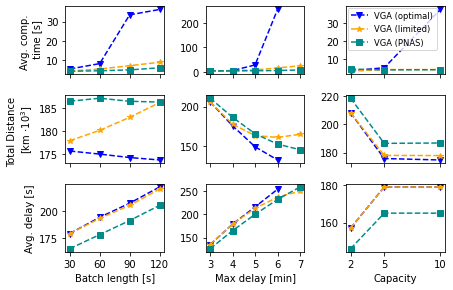

In [49]:
sa.plot_sensitivity_analysis(off_peak_experiments, offpeak_speed_data, offpeak_tt_data, offpeak_delay_data, x_values, "off_peak")

# Manhattan Experiments

In [52]:
loaded_edges = roadmaptools.inout.load_geojson("C:\AIC Experiment Data\VGA Manhattan\maps/edges.geojson")
edge_data = edges.make_data_frame(loaded_edges)

[19:12:15]: Loading geojson file from: C:\AIC Experiment Data\VGA Manhattan\maps\edges.geojson
[19:12:18]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-max_delay_3_min\ridesharing.csv to dataframe
[19:12:19]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga_gap_0002-start_1830-real_speeds\ridesharing.csv to dataframe
[19:12:21]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga_gap_0002-start_1830-real_speeds-delay_5_min\ridesharing.csv to dataframe
[19:12:22]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-max_delay_6_min\ridesharing.csv to dataframe
[19:12:24]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-lim-max_delay_3_min\ridesharing.csv to dataframe
[19:12:26]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-lim-start_1830-real_speeds\ridesharing.csv to dataframe
[19:12:27]: Loading csv file from: C:\AIC Experi

KeyError: 'Group Generation Time'

In [57]:
man_exp_dir = r"C:\AIC Experiment Data\VGA Manhattan\experiments/"
sa.check_experiments(manhattan_experiments, man_exp_dir)
manhattan_speed_data, manhattan_tt_data, manhattan_delay_data = sa.load_experiments(manhattan_experiments, edge_data, man_exp_dir)

[19:28:40]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-max_delay_3_min\ridesharing.csv to dataframe
[19:28:41]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga_gap_0002-start_1830-real_speeds\ridesharing.csv to dataframe
[19:28:43]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga_gap_0002-start_1830-real_speeds-delay_5_min\ridesharing.csv to dataframe
[19:28:44]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-max_delay_6_min\ridesharing.csv to dataframe
[19:28:46]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-lim-max_delay_3_min\ridesharing.csv to dataframe
[19:28:48]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-lim-start_1830-real_speeds\ridesharing.csv to dataframe
[19:28:49]: Loading csv file from: C:\AIC Experiment Data\VGA Manhattan\experiments\vga-lim-max_delay_5_min\ridesharing.csv to dataframe
[19:28

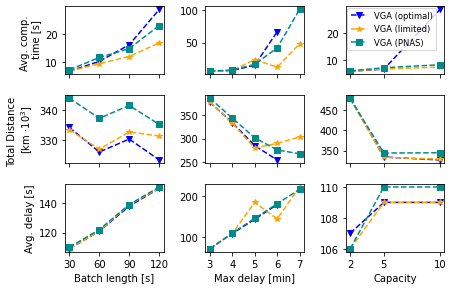

In [58]:
sa.plot_sensitivity_analysis(manhattan_experiments, manhattan_speed_data, manhattan_tt_data, manhattan_delay_data, x_values, "manhattan")

In [6]:
%autoreload
